In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Unifild csv files\ecommerce_furniture_dataset_2024.csv")
df.head(5)

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [4]:
df.shape

(2000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [6]:
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [17]:
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df["originalPrice"] = df["originalPrice"].replace('[\$,]', '', regex=True)
df["originalPrice"] = pd.to_numeric(df["originalPrice"], errors='coerce')
df["originalPrice"].fillna(df["price"], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  2000 non-null   float64
 2   price          2000 non-null   float64
 3   sold           2000 non-null   int64  
 4   tagText        1997 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ KB


In [21]:
print(df.describe())
print(df['tagText'].value_counts())
print(df.isnull().sum())

       originalPrice        price          sold
count    2000.000000  2000.000000   2000.000000
mean      189.538425   156.560020     23.493500
std       260.613128   176.936735    254.094061
min         1.010000     0.990000      0.000000
25%        58.602500    48.530000      1.000000
50%       121.630000   114.080000      3.000000
75%       211.792500   193.490000      9.000000
max      3265.130000  2876.380000  10000.000000
tagText
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13         1
+Shipping: $171.49         1
Name: count, Length: 100, dtype: int64
productTitle     0
originalPrice    0
price            0
sold             0
tagText          3
dtype: int64


In [23]:
df.isnull().sum()

productTitle     0
originalPrice    0
price            0
sold             0
tagText          3
dtype: int64

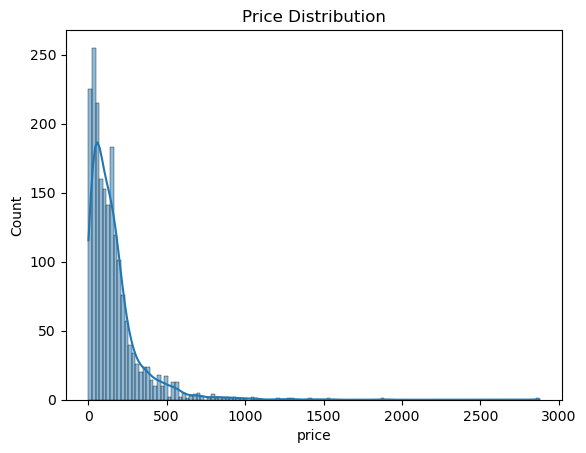

In [25]:
# Histogram: Price
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()



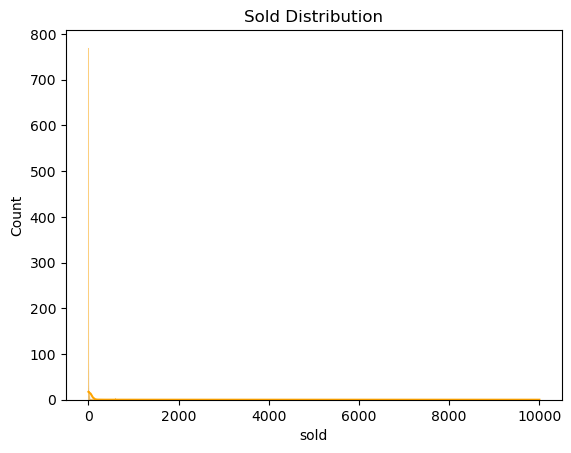

In [27]:
# Histogram: Units Sold
sns.histplot(df["sold"], kde=True, color='orange')
plt.title("Sold Distribution")
plt.show()


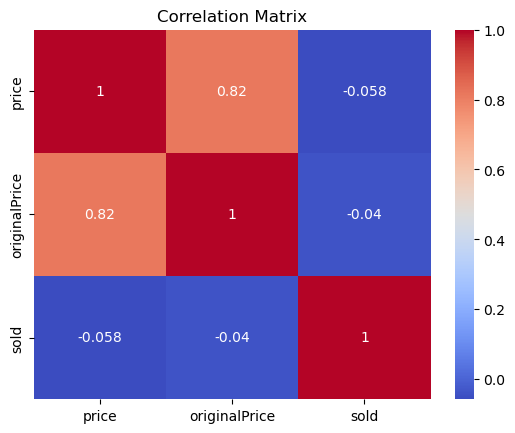

In [28]:
sns.heatmap(df[['price', 'originalPrice', 'sold']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Top sellers
print(df.sort_values("sold", ascending=False).head(10)[["productTitle", "price", "sold"]])

# Least sellers
print(df.sort_values("sold").head(10)[["productTitle", "price", "sold"]])

                                           productTitle  price   sold
1008  Portable round Folding Chair Accordion Chair H...  12.28  10000
1391  MUMUCC Multifunctional Foldable And Adjustable...  21.94   3000
696   MUMUCC Multifunctional Foldable And Adjustable...  26.11   3000
1021  Stylish Shoe Rack Metal Simple Shoe Shelf Foot...  13.64   2000
1174  Portability Foot Rest Under Desk Footrest Ergo...   8.04   1000
22    Office Furniture Computer Stand 42*26cm Adjust...  26.03   1000
1016  Monitor Stand for 13-32 inches Screens, Dual M...  66.68    900
693   Portability Foot Rest Under Desk Footrest Ergo...   5.00    900
1511  Portable Folding Telescopic Stool Lightweight ...  11.20    900
494   Shoe-shelf Shoerack Multilayer Shoe Rack Shoeb...  15.40    700
                                           productTitle   price  sold
1999  Bed Frane Bamboo and Metal Platform Bed Frame ...   99.48     0
612   5-Piece Dining, Farmhouse Set-Extendable Round...  540.91     0
613   Easy Pull Hand

In [36]:
# Feature matrix & target
X = df[["productTitle", "price", "originalPrice", "tagText"]]
y = np.log1p(df["sold"]) 

# Preprocessing
preprocessor = ColumnTransformer([
    ("title", TfidfVectorizer(max_features=100), "productTitle"),
    ("tag", OneHotEncoder(handle_unknown="ignore"), ["tagText"]),
    ("num", "passthrough", ["price", "originalPrice"])
])

#  Model pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# Predict & evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

print("Improved MSE:", mse)
print("Improved R² Score:", r2)

Improved MSE: 5744.472930871143
Improved R² Score: -0.04758877594130029
